In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from enum import Enum
from typing import Any, List

In [2]:
pillbox = np.load('pillbox.npy')

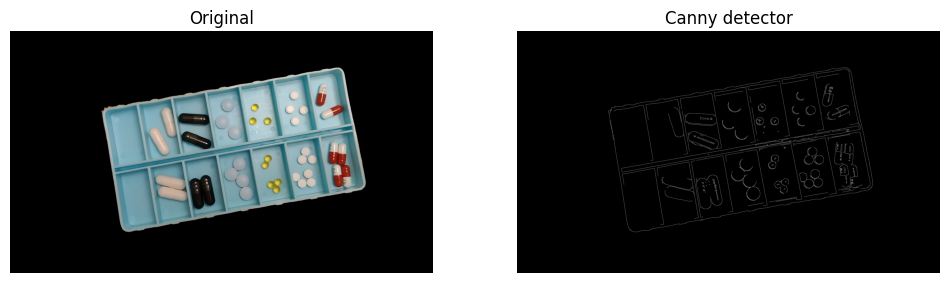

In [3]:
gray = cv2.cvtColor(pillbox, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
canny_pillbox = cv2.Canny(blurred, threshold1 = 60, threshold2 = 120, edges = None, apertureSize = 3)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(pillbox)
axs[0].set_title('Original')
axs[0].axis('off')
axs[1].imshow(canny_pillbox, cmap = 'gray')
axs[1].set_title('Canny detector')
axs[1].axis('off')

plt.show()

In [4]:
def split_cells(img, canny_img):
    
    IMG_COPY = img.copy()
    BLACK_BACKGROUND = cv2.cvtColor(IMG_COPY, cv2.COLOR_RGB2GRAY)
    BLACK_BACKGROUND[BLACK_BACKGROUND == 0] = 255
    BLACK_BACKGROUND[BLACK_BACKGROUND != 0] = 255
    FILTERED_LINES = []
    
    def rhotheta2xy(rho, theta):
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 5000*(-b))
        y1 = int(y0 + 5000*(a))
        x2 = int(x0 - 5000*(-b))
        y2 = int(y0 - 5000*(a))
        return x1, y1, x2, y2
    
    lines = cv2.HoughLines(image = canny_img, 
                        rho = 1.1, 
                        theta = np.pi / 180, 
                        threshold = 220, 
                        lines = None, 
                        srn = 0, 
                        stn = 0)
    
    for rho, theta in lines[:, 0]:
        add_line = True
        for frho, ftheta in FILTERED_LINES:
            if abs(rho - frho) < 40 and abs(theta - ftheta) < np.deg2rad(5):
                add_line = False
                break
        if add_line:
            FILTERED_LINES.append((rho, theta))
    
    if FILTERED_LINES is not None: 
        for rho, theta in FILTERED_LINES:
            x1, y1, x2, y2 = rhotheta2xy(rho, theta)
            pt1 = x1, y1
            pt2 = x2, y2
            cv2.line(IMG_COPY, pt1, pt2, (255, 0, 0), 2, cv2.LINE_AA)
            cv2.line(BLACK_BACKGROUND, pt1, pt2, (0, 0, 0), 2, cv2.LINE_AA)
            
    return IMG_COPY, BLACK_BACKGROUND

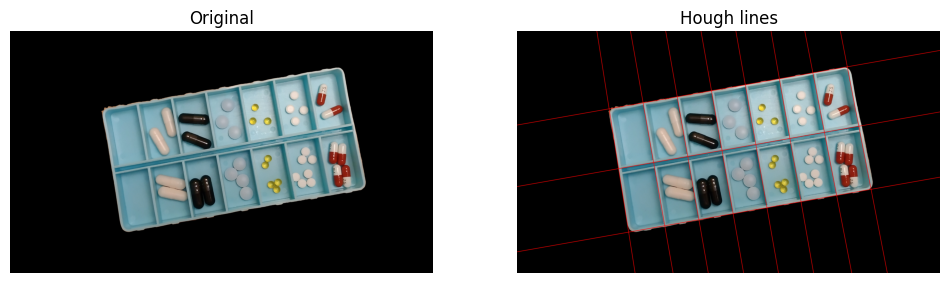

In [5]:
hough_pillbox, hough_lines = split_cells(pillbox, canny_pillbox)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(pillbox)
axs[0].set_title('Original')
axs[0].axis('off')
axs[1].imshow(hough_pillbox, cmap = 'gray')
axs[1].set_title('Hough lines')
axs[1].axis('off')

plt.show()

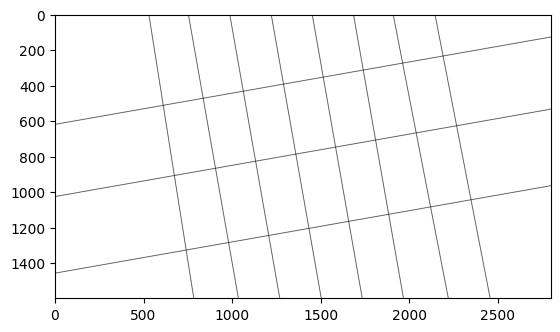

In [6]:
plt.imshow(hough_lines, cmap = 'gray')

In [ ]:
num_labels, labels = cv2.connectedComponents(hough_lines, connectivity= 4)

In [33]:
from scipy.stats import mode

def filter_labels(labels, img):
    flatten_labels = labels.flatten()
    unique_labels = np.array(list(set(labels.flatten())))
    flatten_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY).flatten()
    filtered_labels = []
    
    for label in unique_labels:
        region_mode = mode(flatten_img[flatten_labels == label])[0]
        if region_mode != 0:
            filtered_labels.append(label)
            
    return filtered_labels

filtered_labels = filter_labels(labels, pillbox)

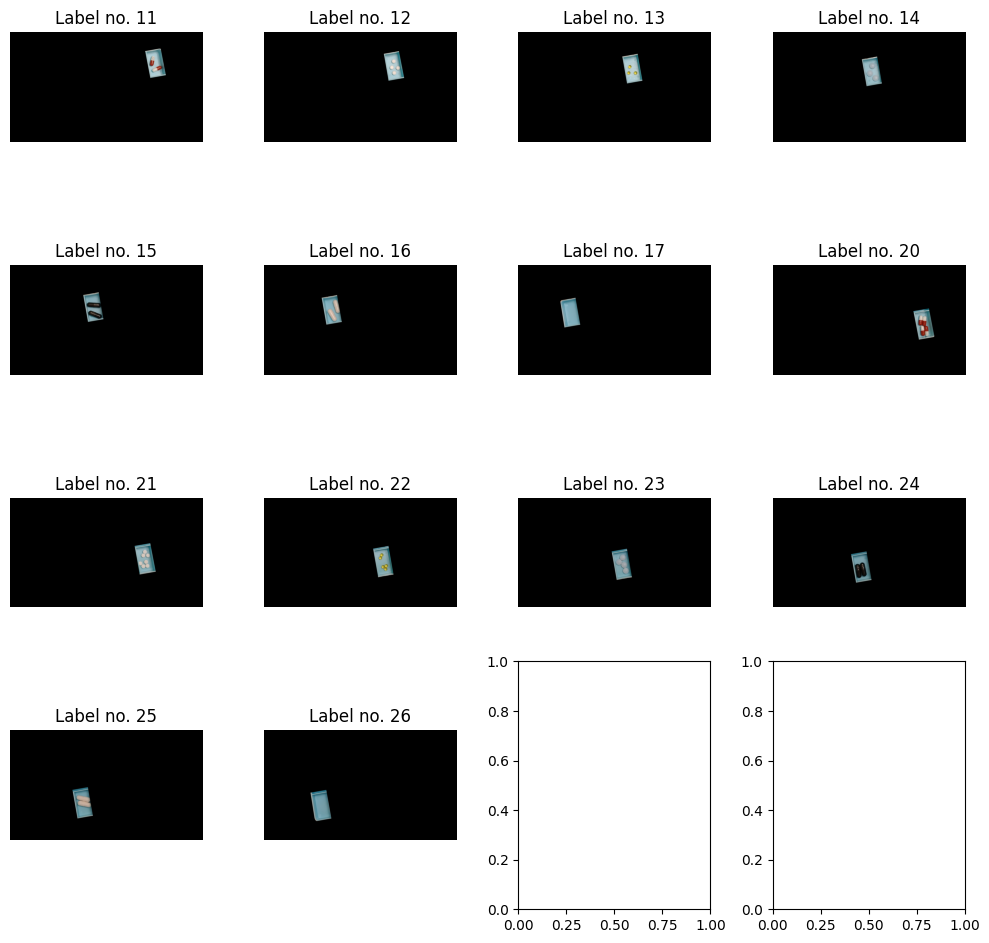

In [37]:
def plot_roi(labels, filtered_labels, img):
    
    fig, axs = plt.subplots(4, 4, figsize = (10, 10))
    
    for i, label in enumerate(filtered_labels):
        roi = img.copy()
        roi[labels != label] = 0
        
        axs[i // 4][i % 4].imshow(roi)
        axs[i // 4][i % 4].set_title(f'Label no. {label}')
        axs[i // 4][i % 4].axis('off')
    
    fig.tight_layout()
    plt.show()
    
plot_roi(labels, filtered_labels, pillbox)

In [38]:
def single_roi(img, labels, k):
    roi = img.copy()
    roi[labels != k] = 0
    return roi

#### Label 11

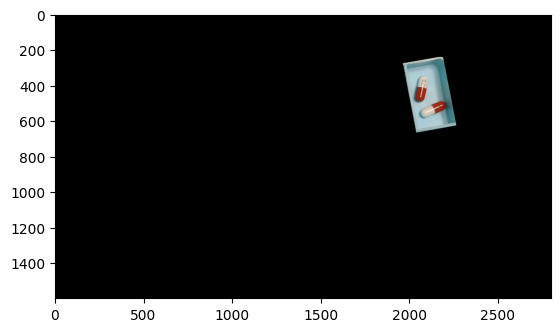

In [39]:
box11 = single_roi(pillbox, labels, 11)
plt.imshow(box11)

#### Label 12

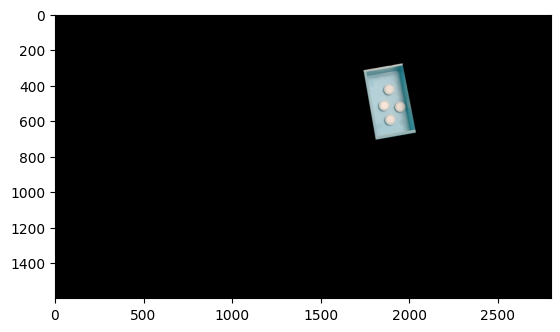

In [40]:
box12 = single_roi(pillbox, labels, 12)
plt.imshow(box12)

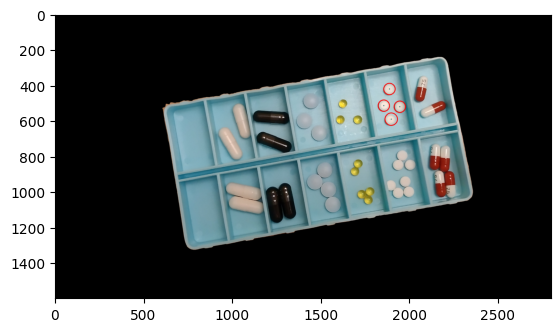

In [56]:
binar12 = cv2.cvtColor(box12, cv2.COLOR_RGB2GRAY)

circles = cv2.HoughCircles(binar12, cv2.HOUGH_GRADIENT, 1, 20,
                               param1=100, param2=14,
                               minRadius=30, maxRadius=40)

src = pillbox.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(src, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(src, center, radius, (255, 0, 0), 3)


plt.imshow(src)

#### Label 13

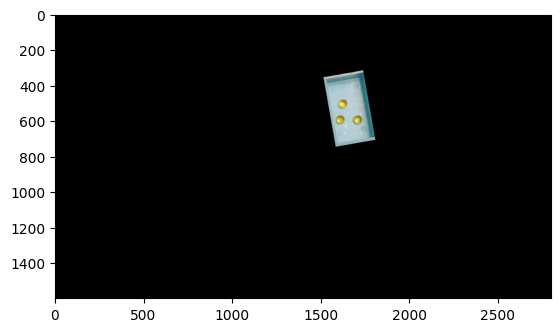

In [43]:
box13 = single_roi(pillbox, labels, 13)
plt.imshow(box13)

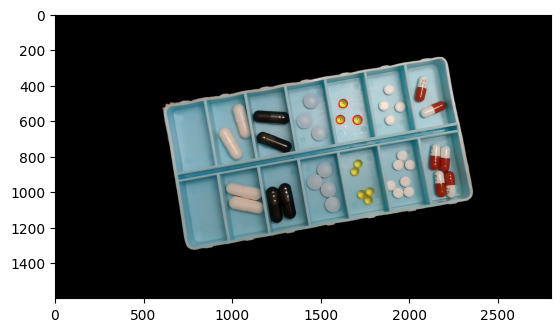

In [86]:
binar13 = cv2.cvtColor(box13, cv2.COLOR_RGB2GRAY)

circles = cv2.HoughCircles(binar13, cv2.HOUGH_GRADIENT, 1, 10,
                               param1=100, param2=28,
                               minRadius=20, maxRadius = 30)

src = pillbox.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(src, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(src, center, radius, (255, 0, 0), 3)


plt.imshow(src)

#### Label 14

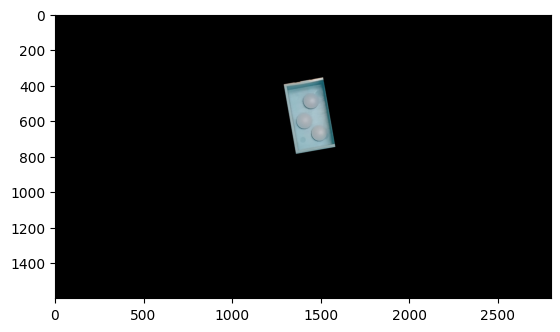

In [47]:
box14 = single_roi(pillbox, labels, 14)
plt.imshow(box14)

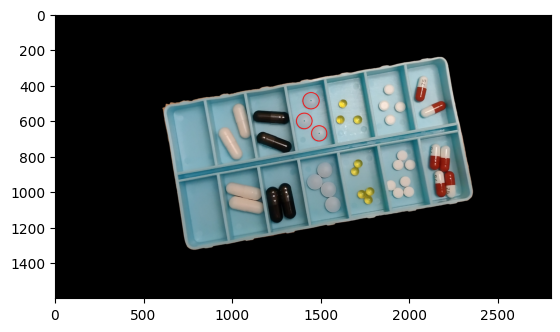

In [82]:
binar14 = cv2.cvtColor(box14, cv2.COLOR_RGB2GRAY)

circles = cv2.HoughCircles(binar14, cv2.HOUGH_GRADIENT, 1, 10,
                               param1=100, param2=28,
                               minRadius = 40, maxRadius=50)

src = pillbox.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(src, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(src, center, radius, (255, 0, 0), 3)


plt.imshow(src)

#### Label 15

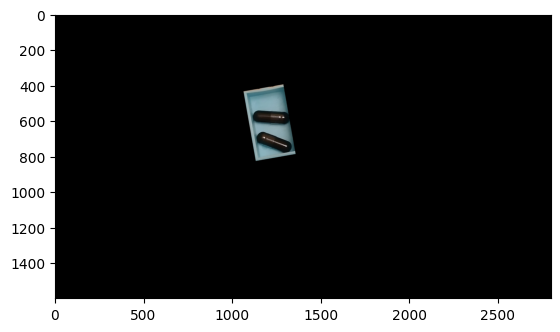

In [73]:
box15 = single_roi(pillbox, labels, 15)
plt.imshow(box15)

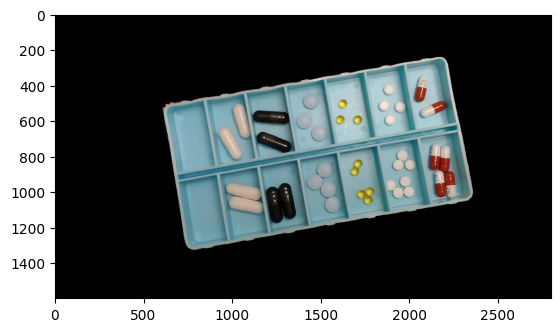

In [76]:
binar15 = cv2.cvtColor(box15, cv2.COLOR_RGB2GRAY)

circles = cv2.HoughCircles(binar15, cv2.HOUGH_GRADIENT, 1, 10,
                               param1=100, param2=28,
                               minRadius = 20, maxRadius=30)

src = pillbox.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(src, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(src, center, radius, (255, 0, 0), 3)


plt.imshow(src)

#### Label 16

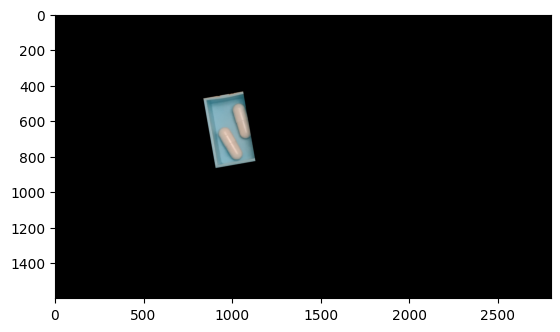

In [77]:
box16 = single_roi(pillbox, labels, 16)
plt.imshow(box16)

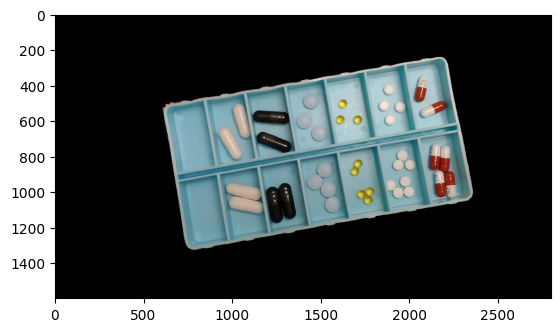

In [80]:
binar16 = cv2.cvtColor(box16, cv2.COLOR_RGB2GRAY)

circles = cv2.HoughCircles(binar16, cv2.HOUGH_GRADIENT, 1, 10,
                               param1=100, param2=28,
                               minRadius = 40, maxRadius=50)

src = pillbox.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(src, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(src, center, radius, (255, 0, 0), 3)


plt.imshow(src)

#### Label 20

#### Label 21

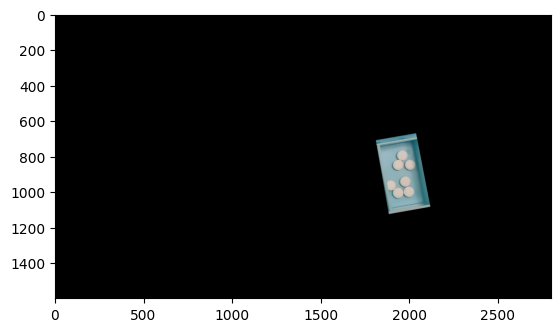

In [52]:
box21 = single_roi(pillbox, labels, 21)
plt.imshow(box21)

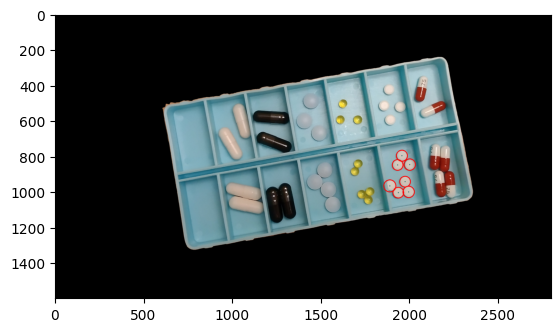

In [55]:
binar21 = cv2.cvtColor(box21, cv2.COLOR_RGB2GRAY)

circles = cv2.HoughCircles(binar21, cv2.HOUGH_GRADIENT, 1, 20,
                               param1=100, param2=14,
                               minRadius=30, maxRadius=40)

src = pillbox.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(src, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(src, center, radius, (255, 0, 0), 3)


plt.imshow(src)

#### Label 22

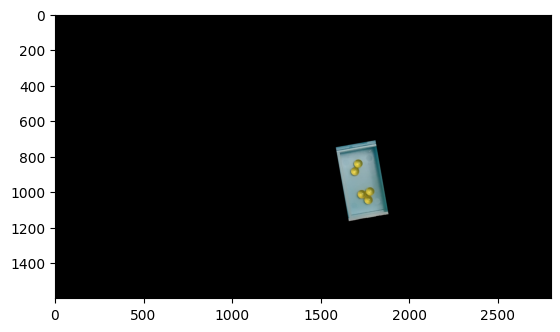

In [51]:
box22 = single_roi(pillbox, labels, 22)
plt.imshow(box22)

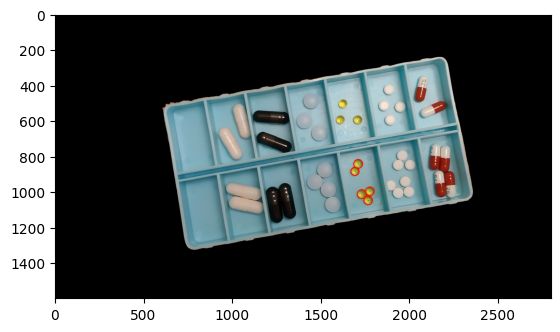

In [67]:
binar22 = cv2.cvtColor(box22, cv2.COLOR_RGB2GRAY)

circles = cv2.HoughCircles(binar22, cv2.HOUGH_GRADIENT, 1, 10,
                               param1=100, param2=28,
                               minRadius=20, maxRadius=30)

src = pillbox.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(src, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(src, center, radius, (255, 0, 0), 3)


plt.imshow(src)

#### Label 23

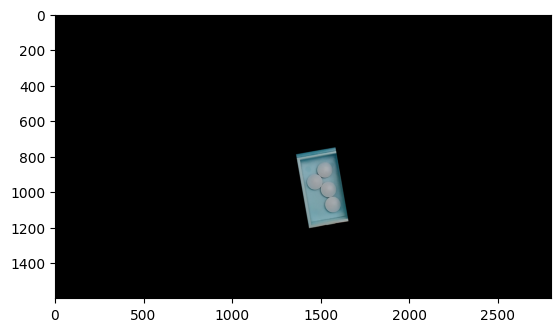

In [68]:
box23 = single_roi(pillbox, labels, 23)
plt.imshow(box23)

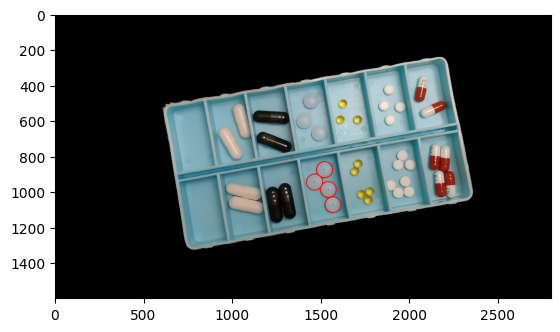

In [71]:
binar23 = cv2.cvtColor(box23, cv2.COLOR_RGB2GRAY)

circles = cv2.HoughCircles(binar23, cv2.HOUGH_GRADIENT, 1, 10,
                               param1=100, param2=28,
                               minRadius = 40, maxRadius=50)

src = pillbox.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(src, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(src, center, radius, (255, 0, 0), 3)


plt.imshow(src)

#### Label 24

#### Label 25

In [ ]:
KETO = 3
ESPU = 4
BIOX = 5

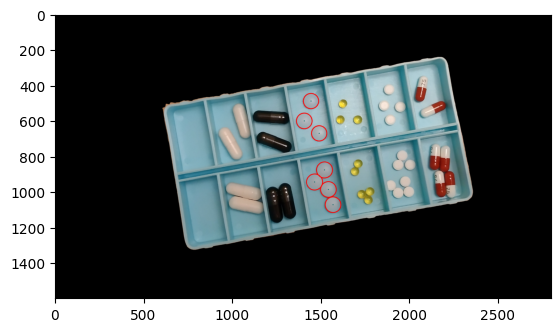

In [153]:
def detect_keto(img):
    
    OUTPUT = img.copy()
    GRAY = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    CIRCLES = cv2.HoughCircles(GRAY, cv2.HOUGH_GRADIENT, 1, 20,
                                param1 = 100, param2 = 22,
                                minRadius = 40, maxRadius = 50)

    if CIRCLES is not None:
        CIRCLES = np.uint16(np.around(CIRCLES))
        for i in CIRCLES[0, :]:
            center = (i[0], i[1])
            cv2.circle(OUTPUT, center, 1, (0, 100, 100), 3)
            radius = i[2]
            cv2.circle(OUTPUT, center, radius, (255, 0, 0), 3)

    plt.imshow(OUTPUT)



detect_keto(pillbox)

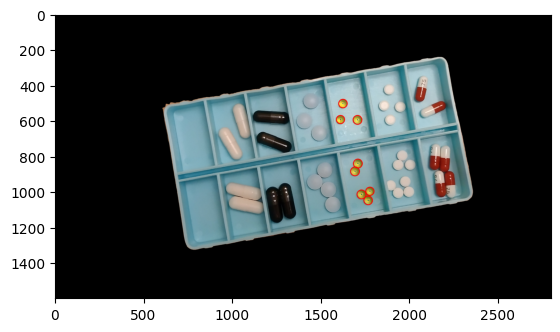

In [150]:
def detect_epsu(img):
    
    OUTPUT = img.copy()
    GRAY = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    CIRCLES = cv2.HoughCircles(GRAY, cv2.HOUGH_GRADIENT, 1, 20,
                                param1 = 100, param2 = 22,
                                minRadius = 20, maxRadius = 26)

    if CIRCLES is not None:
        CIRCLES = np.uint16(np.around(CIRCLES))
        for i in CIRCLES[0, :]:
            center = (i[0], i[1])
            cv2.circle(OUTPUT, center, 1, (0, 100, 100), 3)
            radius = i[2]
            cv2.circle(OUTPUT, center, radius, (255, 0, 0), 3)

    plt.imshow(OUTPUT)



detect_epsu(pillbox)

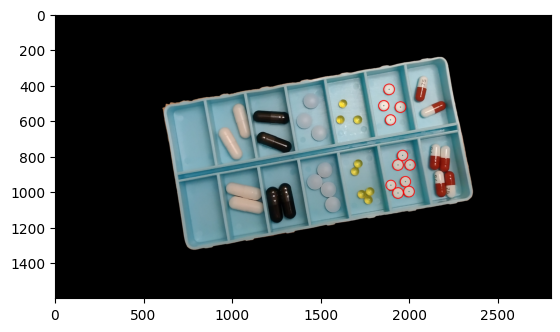

In [ ]:
def detect_biox(img):
    
    OUTPUT = img.copy()
    GRAY = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    CIRCLES = cv2.HoughCircles(GRAY, cv2.HOUGH_GRADIENT, 1, 20,
                                param1 = 100, param2 = 22,
                                minRadius = 28, maxRadius = 36)

    if CIRCLES is not None:
        CIRCLES = np.uint16(np.around(CIRCLES))
        for i in CIRCLES[0, :]:
            center = (i[0], i[1])
            cv2.circle(OUTPUT, center, 1, (0, 100, 100), 3)
            radius = i[2]
            cv2.circle(OUTPUT, center, radius, (255, 0, 0), 3)

    plt.imshow(OUTPUT)



detect_biox(pillbox)

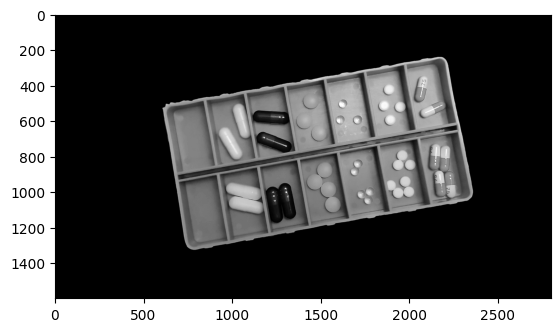

In [96]:
plt.imshow(pillbox[..., 0], cmap = 'gray')

In [97]:
# imgg = cv2.cvtColor(pillbox, cv2.COLOR_RGB2HSV)
# plt.imshow(imgg[..., 1], cmap = 'gray')

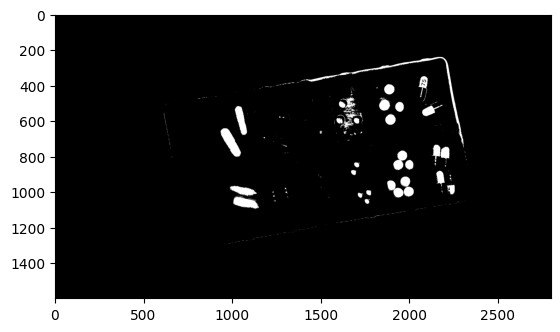

In [119]:
red = pillbox[..., 0]
_, red_t = cv2.threshold(red, 187, 255, cv2.THRESH_BINARY)
plt.imshow(red_t, cmap = 'gray')

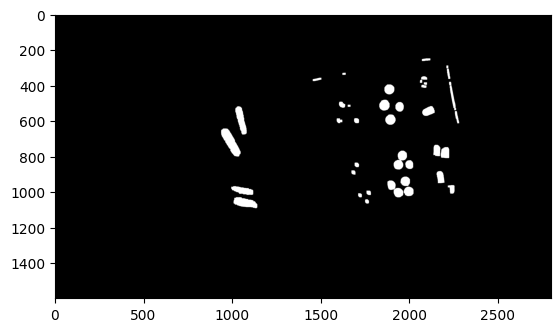

In [121]:
red_m = cv2.morphologyEx(red_t, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8), iterations = 5)
plt.imshow(red_m, cmap = 'gray')